# Seattle AirBNB Data Analysis

#### Udacity DSND Project on writing a Data Science Blog Post

# Context

#### Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

## Content

#### The following Airbnb activity is included in this Seattle dataset: Listings, including full descriptions and average review score Reviews, including unique id for each reviewer and detailed comments * Calendar, including listing id and the price and availability for that day.

## My Questions are as follows:

#### If I want to travel to Seattle, I would research and analyzing on the following questions.

#### 1)What is the average price per day of the week in Seattle?
#### 2)What is the monthly average price/night for the city?
#### 3)What is the availabilty of neigbourhoods in Seattle throughout the year 2016?

## Importing libraries and data to the dataframes

In [1]:
#importing the libraries
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [20]:
#importing the data sets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
#Basic checks
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

## Data Analysis and wrangling

In [7]:
# Analysing NULLS in the datasets

print(calendar.isnull().any())
print()
print(listings.isnull().any())
print()
print(reviews.isnull().any())

listing_id    False
date          False
available     False
price          True
dtype: bool

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
summary                              True
space                                True
description                         False
experiences_offered                 False
neighborhood_overview                True
notes                                True
transit                              True
thumbnail_url                        True
medium_url                           True
picture_url                         False
xl_picture_url                       True
host_id                             False
host_url                            False
host_name                            True
host_since                           True
host_location                        True
host_about               

In [27]:
calendar.isnull().sum(axis = 0)

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [26]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
# We convert the 'price' column from Object to float
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### We will now handle the missing values and make sure they follow the same datatype

In [9]:
# To Convert NaNs to 0 in price column
calendar['price'].fillna(0, inplace=True)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


#### we cannot remove the NAN since there exist too many rows to be deleted. 459028 to be precise

In [10]:
# Convert 'available' column into a true boolean for cleaning 
calendar['available'] = calendar['available'] == 't'
calendar['available'].value_counts()

True     934542
False    459028
Name: available, dtype: int64

In [11]:
# Convert 'date' column into a true date datatype
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

In [13]:
# Pulling the neighbourhood information from the listings dataframe
list = listings[['id','neighbourhood_group_cleansed']]
list.head()

,id,neighbourhood_group_cleansed
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [14]:
# get the min max dates
print(calendar['date'].min())
print(calendar['date'].max())

2016-01-04 00:00:00
2017-01-02 00:00:00


In [15]:
# plit by neighbourhood
list['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [16]:
# Rename neighbourhood column
list = list.rename(index=str, columns={"id": "listing_id", "neighbourhood_group_cleansed":"neighbourhood"})
list.head()

,listing_id,neighbourhood
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [17]:
# Merge both the calendar and the list datasets into a new_df
new_df = pd.merge(calendar, list, on=['listing_id', 'listing_id'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
listing_id       1393570 non-null int64
date             1393570 non-null datetime64[ns]
available        1393570 non-null bool
price            1393570 non-null float64
neighbourhood    1393570 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 54.5+ MB


In [18]:
# To Change the neighbourhood to a categorical variable from object
new_df['neighbourhood'] = new_df['neighbourhood'].astype('category')

In [19]:
# To keep only the necessary columns in listings dataset
columns_loc = ['id', 'neighbourhood', 'neighbourhood_cleansed',
               'zipcode', 'property_type', 'room_type', 'price']

listings_loc = listings[columns_loc]

# This will replace any value that repated 30 times or less to 'other'
prop_tp = listings_loc['property_type'].value_counts()
for c in range(len(prop_tp)):
    val = prop_tp.values[c] 
    ind = prop_tp.index[c]
    if val <= 30:
        listings_loc['property_type']=listings_loc['property_type'].replace(ind,'Other');
        
# Dropping the unnecessary columns       
listings_loc = listings_loc.drop(['neighbourhood', 'zipcode'] , axis = 1)

# To convert the proce column to float
listings_loc['price'] = listings_loc['price'].str.replace(',', '')
listings_loc['price'] = listings_loc['price'].str.replace('$', '')
listings_loc['price'] = listings_loc['price'].astype(float)


# To Convert NaNs prices into 0 price
calendar['price'].fillna(0, inplace=True)

listings_loc.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,id,neighbourhood_cleansed,property_type,room_type,price
0,241032,West Queen Anne,Apartment,Entire home/apt,85.0
1,953595,West Queen Anne,Apartment,Entire home/apt,150.0
2,3308979,West Queen Anne,House,Entire home/apt,975.0
3,7421966,West Queen Anne,Apartment,Entire home/apt,100.0
4,278830,West Queen Anne,House,Entire home/apt,450.0


## Analysing and Visualizing data via Graphs

In [23]:
current_palette = sns.color_palette("muted")

def create_plot(dataframe,x,y,ylim,title,xlabel,ylabel,meanline="price",xticklabel=False):
    """
    Plot creates bar chart visualizations
    
    INPUTS:
    dataframe: pandas dataframe containing columns to be plotted
    x: column of dataframe as a str - example "price"
    y: column of dataframe as a str - example "date"
    ylim: int upper boundary of y-axis
    title: str title for plot - example "Title"
    xlabel: str title for x-axis - example "Xlabel"
    ylabel: str title for y-axis - example "Ylabel"
    meanline: str indicating which mean to take "price" or "occupancy"
    xticklabel: boolean True or False if labels need to be rotated 90 degrees
    
    OUTPUT:
    barchart plot
    """
    
    # Create plot size
    f, ax = plt.subplots(figsize=(8,5))
    # Set background style
    sns.set_style("darkgrid")
    
    if y == "price":
        color="coral"
    else:
        color="cornflowerblue"
    
    # Plot data 
    sns.barplot(x,y,data=dataframe,color=color,saturation=.5,)
    
    # Add titles and labels
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.ylim(0,ylim)
    
    # Add mean line for year
    if meanline == 'price': 
        plt.axhline(calendar[meanline].mean(),color='r',label='Avg for Year')
    else:
        plt.axhline(calendar[meanline].mean()*100,color='b',label='Avg for Year')
    plt.legend();
    
    # Set x-axis labels and rotate vertical
    if(xticklabel):
        ax.set_xticklabels(hood_avg_price_per_month['neighbourhood'], rotation = 90,fontsize=12)
    
    # Move title and plot slightly further apart
    ttl = ax.title
    ttl.set_position([.5, 1.05])
    plt.show()

#### Q1) What is average price per night?

In [24]:
# Weekly average price per night
week = new_df.groupby(new_df['date'].dt.strftime('%w'))['price'].mean()
week = pd.DataFrame(week).reset_index()
week_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
week['date'] = week['date'].replace(['0','1','2','3','4','5','6'], week_list)
week

,date,price
0,Mon,91.837727
1,Tue,91.052596
2,Wed,90.988420
3,Thu,90.992873
4,Fri,91.403801
5,Sat,95.678612
6,Sun,95.624370


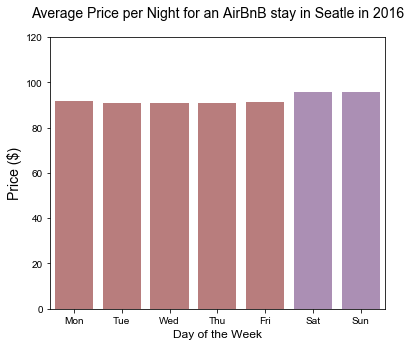

In [25]:
# Barplot visualization of average price per day of the week

# Create variable for weekend
week["weekend"] = week["date"].isin(["Sat", "Sun"])

# Create plot size
f, ax = plt.subplots(figsize=(6,5))
# Set background style
sns.set_style("darkgrid")
# Plot data
sns.barplot(x="date",y="price",hue='weekend',data=week,dodge=False,
            palette=current_palette[2:4],saturation=0.5)

# Add titles and labels
plt.title("Average Price per Night for an AirBnB stay in Seatle in 2016",fontsize=14)
plt.xlabel("Day of the Week",fontsize=12)
plt.ylabel("Price ($)",fontsize=14)
ax.legend('')

# Move title and plot slightly further apart
ttl = ax.title
ttl.set_position([.5, 1.05])

# Set y-axis to 120
plt.ylim(0,120);

#### Answer : We can see that the average per night seems to be higher during weekends as compared to weekdays.

#### Q2) What is monthly average price per night?

In [26]:
# Monthly average price per night
avg_price_per_night = new_df.groupby(new_df['date'].dt.strftime('%m'))['price'].mean()
avg_price_per_night = pd.DataFrame(avg_price_per_night).reset_index()
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
avg_price_per_night['date'] = avg_price_per_night.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
avg_price_per_night

,date,price
0,Jan,69.683499
1,Feb,82.308439
2,Mar,91.233047
3,Apr,89.683700
4,May,94.281823
5,Jun,99.453597
6,Jul,95.377854
7,Aug,97.181255
8,Sep,96.612092
9,Oct,95.444659


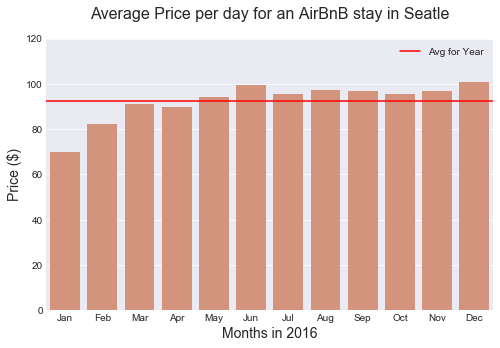

In [27]:
# Barplot visualization of monthly average price per day
[create_plot(avg_price_per_night,"date","price",120,
             title="Average Price per day for an AirBnB stay in Seatle",
             xlabel="Months in 2016",
             ylabel="Price ($)",
             meanline = "price")];

#### We can see that there is price hike in the month of June and decemeber owing to holidays season rush. Price are touching around 100USD in these months whereas for rest of the months its around 95 USD. The lowest price month is Jan followed by Feb

#### Q3) What are the monthly occupancy rates?

In [28]:
# Monthly occupancy rates
occ_ratio_per_month = round(new_df.groupby(new_df['date'].dt.strftime('%m'))['available'].mean()*100,1)
occ_ratio_per_month = pd.DataFrame(occ_ratio_per_month).reset_index()
occ_ratio_per_month['date'] = occ_ratio_per_month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
occ_ratio_per_month

,date,available
0,Jan,56.7
1,Feb,66.2
2,Mar,70.9
3,Apr,66.4
4,May,67.6
5,Jun,67.4
6,Jul,62.7
7,Aug,64.5
8,Sep,67.4
9,Oct,69.7


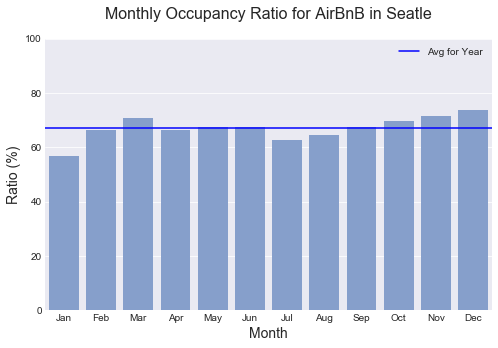

In [29]:
# Bar graph visualization of the monthly occupancy ratio
[create_plot(occ_ratio_per_month,"date","available",100,
             title="Monthly Occupancy Ratio for AirBnB in Seatle",
             xlabel="Month",
             ylabel="Ratio (%)",
             meanline = "available")];

#### We can see the highest occupancy rates are highest in Dec (74%) which is directly correlated to high pricing by AirBNB. The lowest occupancy rates are in Jan and Feb which explains why the rates are also low during these months.

# Conclusion:


In this Analysis, we observed that how homes in Seattle were performing according to Airbnb open data.

We also observed that in Seattle, room rates are increasing over period and increased more in weekend, and the peak season in was in June, July, and August. The accommodation reach to highest prices during these months. We can easily say that more the prices, more occupancy since thats the strategy of Hotel Business